# Importing Packages

First, we need to import the necessary packages that we will be using for our project.

In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163489 sha256=7793afcdafb5c64077b1a89b227313a22559780a8415d776a5a24a9aab87dbae
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
pip install import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.7 MB/s eta 0:00:00


In [ ]:
import os
import requests
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
import tensorflow as tf
import tensorflow_hub as hub
import base64
from PIL import Image
import io
import math
from math import sqrt
from surprise import Reader
from collections import Counter
import import_ipynb
from surprise import (
    Dataset,
    KNNBaseline,
    SVD,
    Reader,
    accuracy,
    Prediction,
)

from collections import defaultdict

import gdown

In [ ]:
credits_id = '1OgAdH8h-8gBTh3IvZAKkfilgJ7NP_PYJ'
gdown.download(f'https://drive.google.com/uc?id={credits_id}', 'credits.csv')
credits = pd.read_csv('credits.csv')

keywords_id = '1pwuGPB-f8sX0HBZm4lXIjwVNxpgBM6EE'
gdown.download(f'https://drive.google.com/uc?id={keywords_id}', 'keywords.csv')
keywords = pd.read_csv('keywords.csv')

links_small_id = '1CeVsfXl2MHqunJXJsPhGKg9EqT5rWNhq'
gdown.download(f'https://drive.google.com/uc?id={links_small_id}', 'links_small.csv')
links_small = pd.read_csv('links_small.csv')

movies_metadata_id = '1fiKyla5QlCGq1ERb5IT7GlDVxehkLK0P'
gdown.download(f'https://drive.google.com/uc?id={movies_metadata_id}', 'movies_metadata.csv')
metadata = pd.read_csv('movies_metadata.csv')

ratings_small_id = '1rVEKuncfTQUeS8eTzT_TxThskkCqeppV'
gdown.download(f'https://drive.google.com/uc?id={ratings_small_id}', 'ratings_small.csv')
ratings_small = pd.read_csv('ratings_small.csv')

saved_model_id = "1NOCkntvH-Sdrr-UhjU7sugjGY798TnS-"
gdown.download(f'https://drive.google.com/uc?id={saved_model_id}', 'saved_model.pb')

Downloading...
From: https://drive.google.com/uc?id=1OgAdH8h-8gBTh3IvZAKkfilgJ7NP_PYJ
To: /content/credits.csv
100%|██████████| 190M/190M [00:03<00:00, 58.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pwuGPB-f8sX0HBZm4lXIjwVNxpgBM6EE
To: /content/keywords.csv
100%|██████████| 6.23M/6.23M [00:00<00:00, 75.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CeVsfXl2MHqunJXJsPhGKg9EqT5rWNhq
To: /content/links_small.csv
100%|██████████| 183k/183k [00:00<00:00, 55.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fiKyla5QlCGq1ERb5IT7GlDVxehkLK0P
To: /content/movies_metadata.csv
100%|██████████| 34.4M/34.4M [00:00<00:00, 169MB/s] 
<ipython-input-5-97faa99563b7>:15: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')
Downloading...
From: https://drive.google.com/uc?id=1rVEKuncfTQUeS8eTzT_TxThskkCqeppV
To: /content/ratings_small.csv
100%|██████████| 2.44M/2.44M [00:0

'saved_model.pb'

In [ ]:
new_directory = "/content"
os.chdir(new_directory)
poster_dir = 'variables'
os.makedirs(poster_dir, exist_ok=True)
variablesdata_id = "1d9_jWfow-e846dte-gQ6EUtcZOpKGKd0"
gdown.download(f'https://drive.google.com/uc?id={variablesdata_id}', 'variables.data-00000-of-00001')
variables_index_id = "1_Pl7uEzgzgK3jAbFdlPd2v5XaCIoKk3i"
gdown.download(f'https://drive.google.com/uc?id={variables_index_id}', 'variables.index')


new_directory = "/content"
os.chdir(new_directory)

Downloading...
From: https://drive.google.com/uc?id=1d9_jWfow-e846dte-gQ6EUtcZOpKGKd0
To: /content/variables.data-00000-of-00001
100%|██████████| 9.07M/9.07M [00:00<00:00, 126MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_Pl7uEzgzgK3jAbFdlPd2v5XaCIoKk3i
To: /content/variables.index
100%|██████████| 5.28k/5.28k [00:00<00:00, 10.4MB/s]


# Loading Dataset

We first load all the files that we will be using from our chosen dataset.

Lets take a look at the `metadata` dataframe.

In [ ]:
print(metadata.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [ ]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
ratings_small.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


# Cleaning Metadata

Transforming the dictionaries to lists and transforming the average ratings using bayesian average.

### Cleaning the data

In [ ]:
metadata.isnull().sum(), metadata[['genres', 'production_companies', 'production_countries', 'spoken_languages']].isnull().sum()

(adult                        0
 belongs_to_collection    40972
 budget                       0
 genres                       0
 homepage                 37684
 id                           0
 imdb_id                     17
 original_language           11
 original_title               0
 overview                   954
 popularity                   5
 poster_path                386
 production_companies         3
 production_countries         3
 release_date                87
 revenue                      6
 runtime                    263
 spoken_languages             6
 status                      87
 tagline                  25054
 title                        6
 video                        6
 vote_average                 6
 vote_count                   6
 dtype: int64,
 genres                  0
 production_companies    3
 production_countries    3
 spoken_languages        6
 dtype: int64)

The fields that consists of arrays are actually read in as a string. Hence we have to convert them to arrays using the `literal_eval` function from the `ast` package.

In [ ]:
# The columns we have to transform are genres, production_companies, production_countries, and spoken_languages


metadata_cleaned = metadata.copy()

# clean genres
metadata_cleaned['genres'] = metadata['genres'].apply(literal_eval).apply(lambda x : [i['name'] for i in x])

# clean production_companies
metadata_cleaned['production_companies'] = metadata['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance(x, list) else [])

# clean production_countries
metadata_cleaned['production_countries'] = metadata['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance(x, list) else [])

#clean spoken_languages
metadata_cleaned['spoken_languages'] = metadata['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x : [i['name'] for i in x] if isinstance(x, list) else [])

check_cleaned = metadata_cleaned[['genres', 'production_companies', 'production_countries', 'spoken_languages']]
check_cleaned

,genres,production_companies,production_countries,spoken_languages
0,"[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,"[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,"[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]
3,"[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English]
4,[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English]
...,...,...,...,...
45461,"[Drama, Family]",[],[Iran],[فارسی]
45462,[Drama],[Sine Olivia],[Philippines],[]
45463,"[Action, Drama, Thriller]",[American World Pictures],[United States of America],[English]
45464,[],[Yermoliev],[Russia],[]


In [ ]:
check_cleaned.isna().sum()

genres                  0
production_companies    0
production_countries    0
spoken_languages        0
dtype: int64

### Clean and subset the metadata dataframe

Now, we will take only a subset of the movie data (only the movies found in `links_small`, which will be explain why later) and also drop duplicate movies in the `metadata` dataframe. We will call this new dataframe `metadata_cleaned`, and will be using it for the rest of the project.

In [ ]:
# dropping duplicate ids
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
metadata_cleaned = metadata_cleaned.drop([19730, 29503, 35587])
metadata_cleaned['id'] = metadata_cleaned['id'].astype('int')

metadata_cleaned = metadata_cleaned.drop_duplicates(subset='id', keep='first')
metadata_cleaned.shape

(45433, 24)

### Transforming the ratings (Demographic Filtering)

Bayesian Average Formula = (Ratings Avg * Rating count + C * m) / (Ratings count + C)

Lets first use a naive threshold quantile of 90.

In [ ]:
# First we can calculate m, which is the number of votes at 90th quantile
C = metadata_cleaned['vote_count'].quantile(0.90)
m = metadata_cleaned['vote_average'].mean()
m, C

# Now we can compute the bayesian average at 90 quantile threshold
metadata_cleaned['bayesavg_90'] = (metadata_cleaned['vote_average'] * metadata['vote_count'] + C * m) / (metadata['vote_count'] + C)

metadata_cleaned.sort_values(by = 'bayesavg_90', ascending = False).head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,bayesavg_90
314,False,NaN,25000000,"[Drama, Crime]",NaN,278,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,2.834147e+07,142.0,[English],Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,False,8.5,8358.0,8.445871
834,False,"{'id': 230, 'name': 'The Godfather Collection'...",6000000,"[Drama, Crime]",http://www.thegodfather.com/,238,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,2.450664e+08,175.0,"[English, Italiano, Latin]",Released,An offer you can't refuse.,The Godfather,False,8.5,6024.0,8.425442
10309,False,NaN,13200000,"[Comedy, Drama, Romance]",NaN,19404,tt0112870,hi,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",...,1.000000e+08,190.0,[हिन्दी],Released,Come... Fall In Love,Dilwale Dulhania Le Jayenge,False,9.1,661.0,8.421477
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[Drama, Action, Crime, Thriller]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[English, 普通话]",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.265479
2843,False,NaN,63000000,[Drama],http://www.foxmovies.com/movies/fight-club,550,tt0137523,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1.008538e+08,139.0,[English],Released,Mischief. Mayhem. Soap.,Fight Club,False,8.3,9678.0,8.256387


In [ ]:
metadata_cleaned[metadata_cleaned["vote_count"] < 160]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,bayesavg_90
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,5.940209
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.702746
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[Français, English]",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,5.890806
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[English, Deutsch]",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,5.570403
13,False,NaN,44000000,"[History, Drama]",NaN,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,13681765.0,192.0,[English],Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0,6.078158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,[فارسی],Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,5.608278
45462,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,[],Released,NaN,Century of Birthing,False,9.0,3.0,5.680569
45463,False,NaN,0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,[English],Released,A deadly game of wits.,Betrayal,False,3.8,6.0,5.552607
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,5.618329


# Training the CBF on Movie Description

Based on our observations on the Movie Metadata, we can see 2 fields contain the description of movies, `overview` and `tagline`. Since both these fields contain movie information in the form of sentences, we will attempt to create a Content-Based Filtering Model to recommend movies that are similar with each user's watch history, with respect to its overview and taglines.

For simplicity, we will call this new field `description`, where `description` = concat (`overview`, `tagline`)

### 1. Obtaining the new `description` column.

Firstly, let us subset the large Movie Metadata. The reason for this subset will be explained later, but essentially, this helps us to carry out our model evaluation more effectively.

In [ ]:
metadata_cleaned = metadata_cleaned[metadata_cleaned['id'].isin(links_small)]

Next, we want to take care of any missing values, in both `overview` and `tagline`, before concatenating them into the new field `description`.

In [ ]:
metadata_cleaned['tagline'] = metadata_cleaned['tagline'].fillna('')
metadata_cleaned['description'] = metadata_cleaned['overview'] + metadata_cleaned['tagline']
metadata_cleaned['description'] = metadata_cleaned['description'].fillna('')

# making sure that the id is of int type too
metadata_cleaned['id'] = metadata_cleaned['id'].astype('int')

Let's take a look at our new `metadata_cleaned`.

In [ ]:
metadata_cleaned.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,bayesavg_90,description
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,[English],Released,,Toy Story,False,7.7,5415.0,7.640257,"Led by Woody, Andy's toys live happily in his ..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820300,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,5.940209,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.702746,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5.660759,Just when George Banks has recovered from his ...


### 2. TF-IDF + Cosine Similarity on `description`

Next we can apply tf-idf to the `description` column. The reason for using tf-idf is because we want to capture the importance of the words in the `description` documents, relative to the larger collection of documents. Since these values are essentially english sentences, we want to downweight common words that might appear across many documents.

In [ ]:
# computing tf-idf
tfs = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfs.fit_transform(metadata_cleaned['description'])

Next we check for the shape of our tf-idf matrix. Here, we can see that only 9082 rows were selected from the 45433 rows that we had originally. This is ensure that the cosine similarities can be computed more efficiently as compared to if we used the entire full metadata. Subsetting the full dataset will not affect our performance as much, but reasons for this will be explained in depth later.

In [ ]:
tfidf_matrix.shape

(45433, 77744)

Now we can compute the cosine similarity matrix based on the tf-idf matrix.

In [ ]:
# computing Cosine Similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

NameError: ignored

In [ ]:
cosine_sim

array([[1.        , 0.01666704, 0.        , ..., 0.        , 0.        ,
        0.01148298],
       [0.01666704, 1.        , 0.04320655, ..., 0.        , 0.00494981,
        0.01012138],
       [0.        , 0.04320655, 1.        , ..., 0.00439567, 0.00629386,
        0.        ],
       ...,
       [0.        , 0.        , 0.00439567, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.00494981, 0.00629386, ..., 0.        , 1.        ,
        0.0040568 ],
       [0.01148298, 0.01012138, 0.        , ..., 0.        , 0.0040568 ,
        1.        ]])

Now let's create an index of movie titles so we can look up movie similarities.

Here, we have to create a series of indexes, since the movies are not recorded in accordance to their movie id. The series of indexes will help to point our results to the right index movie.

In [ ]:
metadata_cleaned = metadata_cleaned.reset_index()

In [ ]:
titles = metadata_cleaned['title']
indices = pd.Series(metadata_cleaned.index, index=metadata_cleaned['title'])

# creation of id to index mappings that we will need for our evaluation later
id_index_mapping = {}
index_id_mapping = {}
for i, row in metadata_cleaned.iterrows():
    id_index_mapping[row['id']] = i
    index_id_mapping[i] = row['id']

indices.head()

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

Now we can create helper functions to extract recommendations based on the cosine similarity matrix. Let's create a `get_topk_recommendations` function to obtain the top k recommendations based on 2 inputs `movie_title` and `k`.

In [ ]:
# top k recommendations
def get_topk_recommendations(title, k):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:k + 1]]
    return titles.iloc[movie_indices]

Let's use this recommender to make recommendations for the top rated movie, `The Shawshank Redemption`.

In [ ]:
print(get_topk_recommendations("The Shawshank Redemption", 5))

505               Chasers
8201       Les Misérables
4050             Breakout
3765             Brubaker
1302    Alive and Kicking
Name: title, dtype: object


As we can see, our recommender works well, and most of the recommended movies above are is associated with prison, escape and tradgedy.

Now we have to make a similar function to output recommendations based on the `id` of the movie. We will need to use this function in our evaluation portion.

This function will return an array of recommended `id`s.

In [ ]:
def get_topk_recommendations_movieid(movieid, k):
    idx = id_index_mapping[movieid]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:k + 1]]
    result = []
    for i in movie_indices:
        if i in index_id_mapping:
            result.append(index_id_mapping[i])
    return result

print(get_topk_recommendations_movieid(278, 5)) # The Shawshank Redemption id is 278

[24405, 82695, 31671, 1623, 172545]


### 3. Creating a CNN Element to our Recommender.

For this section, we are experimenting to find whether we can incorporate a CNN layer to our recommender. This means that after our CBF Recommender above outputs its top k recommendations, it will then be run into this CNN model to refine the recommendations.

The CNN recommender will be trained on the posters that we can extract via the `imdb_id` in the movies metadata dataset.

First we need a new helper function to take in the movie title and output a list of movie and imdb_id.

In [ ]:
# CNN Recommender
def get_topk_recommendations_cnn(title, k):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:k + 1]]
    result = [(title, metadata_cleaned['imdb_id'].iloc[idx])]
    for i in movie_indices:
        if i in index_id_mapping:
            name = titles.iloc[i]
            imdb_tt = metadata_cleaned['imdb_id'].iloc[i]
            result.append((name, imdb_tt))
    return result

Lets test out this recommender. Note that here, we also have to output the input movie itself.

As you can see below, the output matches our initial CBF recommender, with the original input `The Shawshank Redemption` inserted at the head of the array.

In [ ]:
print(get_topk_recommendations_cnn("The Shawshank Redemption", 5))

[('The Shawshank Redemption', 'tt0111161'), ('Chasers', 'tt0109403'), ('Les Misérables', 'tt1707386'), ('Breakout', 'tt0072737'), ('Brubaker', 'tt0080474'), ('Alive and Kicking', 'tt0116631')]


Now, let's create a new directory to download and save the posters.

Below is just a helper function to help clear the posters folder, for now, we will leave it commented.

To clear the posters folder, just uncomment and run the code chunk.

In [ ]:
new_directory = "/content"
os.chdir(new_directory)
poster_dir = 'posters'
os.makedirs(poster_dir, exist_ok=True)


In [ ]:
def clear_folder(folder_path):
    # List all items in the folder
    items = os.listdir(folder_path)

    # Iterate over each item and remove it
    for item in items:
        item_path = os.path.join(folder_path, item)
        try:
            if os.path.isfile(item_path):
                os.remove(item_path)
            elif os.path.isdir(item_path):
                os.rmdir(item_path)
        except Exception as e:
            print(f"Error deleting {item_path}: {e}")

# Specify the folder path you want to clear
folder_to_clear = "/content/posters"

# Call the function to clear the folder
clear_folder(folder_to_clear)

Let's first create and enter the posters directory.

In [ ]:
new_directory = "/content"
os.chdir(new_directory)
poster_dir = 'posters'
os.makedirs(poster_dir, exist_ok=True)

Now we degine a function that helps us to download and save the posters

In [ ]:
def download_poster(api_key, imdb_id, title):
    base_url = 'http://www.omdbapi.com/'
    params = {'i': imdb_id, 'apikey': api_key}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        poster_url = data.get('Poster', '')
        if poster_url:
            response = requests.get(poster_url)
            if response.status_code == 200:
                image_path = os.path.join(poster_dir, f"{title}.jpg")
                with open(image_path, 'wb') as img_file:
                    img_file.write(response.content)
                    print(f"Downloaded Poster for '{title}'")

Let's try downloading the posters of our recommendations for `The Shawshank Redemption`.

In [ ]:
api_key = 'dc9ff1d8'

recommended = get_topk_recommendations_cnn("The Shawshank Redemption", 5)

for title, imdb_id in recommended:
    download_poster(api_key,imdb_id,title)

Downloaded Poster for 'The Shawshank Redemption'
Downloaded Poster for 'Chasers'
Downloaded Poster for 'Les Misérables'
Downloaded Poster for 'Breakout'
Downloaded Poster for 'Brubaker'
Downloaded Poster for 'Alive and Kicking'


In [ ]:
num_classes = 1280

%matplotlib inline
new_directory = "/content"
os.chdir(new_directory)
global embed
embed = hub.KerasLayer(os.getcwd())

Here we converted the posters into vectors.

In [ ]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):
        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)


In [ ]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image
    """
    with open(FileName, "rb") as f:
        data = f.read()

    res = base64.b64encode(data)

    base64data = res.decode("UTF-8")

    imgdata = base64.b64decode(base64data)

    image = Image.open(io.BytesIO(imgdata))

    return np.array(image)

def cosine_similarity_cnn(a1, a2):
    dot_product = np.dot(a1, a2)
    norm_a1 = np.linalg.norm(a1)
    norm_a2 = np.linalg.norm(a2)

    cosine_sim = dot_product / (norm_a1 * norm_a2)
    return cosine_sim

def list_posters_in_folder(folder_path):
    posters = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    return posters

Here, we computed the cosine similarity scores and applied a threshold of 0.7 to filter out certain movies.

In [ ]:
posters_folder = "/content/posters"
os.chdir(posters_folder)

all_posters = list_posters_in_folder(posters_folder)

def poster_recommendation(movie_name):
    matching_poster = [poster for poster in all_posters if movie_name.lower() == os.path.splitext(poster)[0].lower()]
    target_poster = matching_poster[0]
    result = []
    helper = TensorVector(target_poster)
    vector = helper.process()
    for poster in all_posters:

        poster_name_without_extension = os.path.splitext(poster)[0]
        if (movie_name != poster_name_without_extension):
            helper2 = TensorVector(poster)
            vector2 = helper2.process()
            sim = cosine_similarity_cnn(vector,vector2)
            if (sim >= 0.70):
                result.append(poster)
    return result

print(poster_recommendation("The Shawshank Redemption"))

['Breakout.jpg', 'Brubaker.jpg', 'Alive and Kicking.jpg', 'Les Misérables.jpg']


As you can see from the result above, the movie `Chasers` has been filtered out of the recommendations as it did not hit the 70% threshold similarity that was set. Upon close observation of the movie posters, the apparent differences between the `Chasers` poster and the others can be observed.

# Evaluating the CBF on `description` recommender

In this section, we will aim to evaluate our trained CBF recommender on the ratings dataset.

### 1. Exploring the `ratings_small` Dataset.

Firstly, let us take a look at the distribution of number of ratings for each user, and the distribution of user ratings.

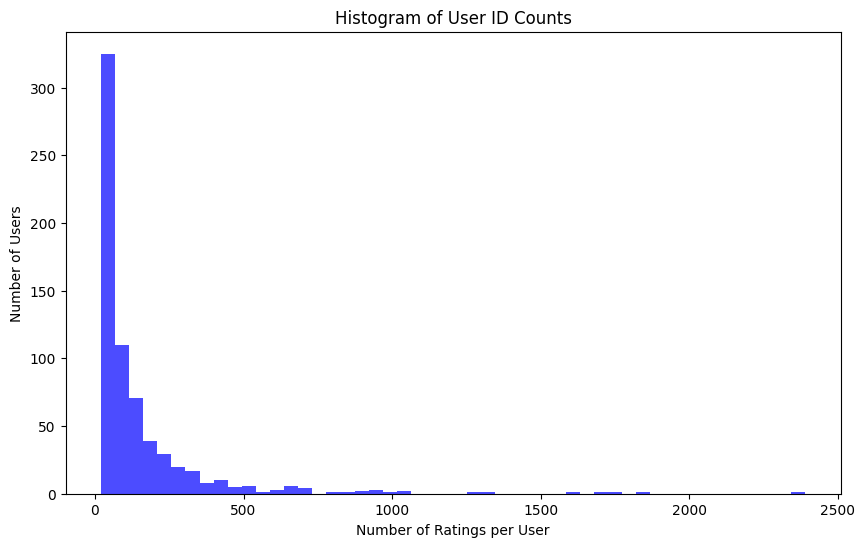

In [ ]:
user_counts = ratings_small['userId'].value_counts()

plt.figure(figsize=(10, 6))
plt.hist(user_counts, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of User ID Counts')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.show()

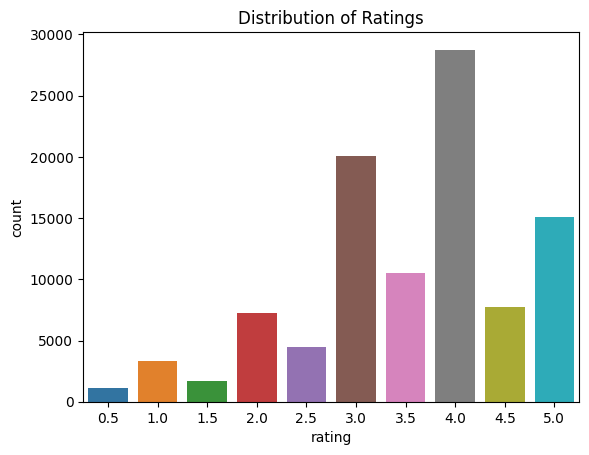

In [ ]:
# Distribution of ratings
sns.countplot(x='rating', data = ratings_small)
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
ratings_small.describe(), ratings_small.isnull().sum()

(              userId        movieId         rating     timestamp
 count  100004.000000  100004.000000  100004.000000  1.000040e+05
 mean      347.011310   12548.664363       3.543608  1.129639e+09
 std       195.163838   26369.198969       1.058064  1.916858e+08
 min         1.000000       1.000000       0.500000  7.896520e+08
 25%       182.000000    1028.000000       3.000000  9.658478e+08
 50%       367.000000    2406.500000       4.000000  1.110422e+09
 75%       520.000000    5418.000000       4.000000  1.296192e+09
 max       671.000000  163949.000000       5.000000  1.476641e+09,
 userId       0
 movieId      0
 rating       0
 timestamp    0
 dtype: int64)

### 2. Transforming the `ratings_small` Dataset.

From the plots and tables above, we can see the the ratings dataset is relatively clean, with the mean rating being a score of 3.54.

In the `ratings_small` dataset, we have to join to `links_small` dataset on `movieId` in order to obtain the `tmdbId`, similar to what we have done above when we took a subset of the full movies metadata.

In [ ]:
# changing our directory back
new_directory = "/content"
os.chdir(new_directory)

links_s = pd.read_csv('links_small.csv')
links_s

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


Now we merge the the 2 datasets and obtain the new values of `id` that match the ones that we trained our model on.

In [ ]:

links_s = pd.read_csv('links_small.csv')

merged_df = ratings_small.merge(links_s, on='movieId', how='left')

merged_df['movieId'] = merged_df['tmdbId']
merged_df = merged_df.iloc[:, :4]
merged_df['movieId'] = merged_df['movieId'].fillna(0).astype(int)
merged_df

ratings_small = merged_df

And now, since the mean ratings is 3.54, lets take 4.0 the minimum score threshold for liking a movie.

In [ ]:
ratings_small['like'] = (ratings_small['rating'] >= 4).astype(int)
ratings_small

,userId,movieId,rating,timestamp,like
0,1,9909,2.5,1260759144,0
1,1,11360,3.0,1260759179,0
2,1,819,3.0,1260759182,0
3,1,1103,2.0,1260759185,0
4,1,11216,4.0,1260759205,1
...,...,...,...,...,...
99999,671,25461,2.5,1065579370,0
100000,671,51927,4.0,1065149201,1
100001,671,604,4.0,1070940363,1
100002,671,1088,2.5,1070979663,0


Then, we can go ahead and an order each like and dislike based on their timestamps.

In [ ]:
## we want to make a new df by taking into consideration the order of the timestamps

liked_movies = ratings_small[ratings_small['like'] == 1][['userId', 'movieId', 'timestamp']]
disliked_movies = ratings_small[ratings_small['like'] == 0][['userId', 'movieId', 'timestamp']]

# Group by 'userId' and aggregate liked and disliked movies into dictionaries
liked_dict = liked_movies.groupby('userId').apply(lambda x: dict(zip(x['movieId'], x['timestamp']))).apply(lambda x: dict(sorted(x.items(), key=lambda item: item[1]))).rename('liked')
disliked_dict = disliked_movies.groupby('userId').apply(lambda x: dict(zip(x['movieId'], x['timestamp']))).apply(lambda x: dict(sorted(x.items(), key=lambda item: item[1]))).rename('disliked')

# Merge liked and disliked dictionaries based on 'userId'
user_movies_mapped = pd.merge(liked_dict, disliked_dict, on='userId', how='outer')

# Reset index to get 'userId' as a regular column
user_movies_mapped.reset_index(inplace=True)

# Display the resulting DataFrame
user_movies_mapped


,userId,liked,disliked
0,1,"{97: 1260759139, 1051: 1260759191, 11216: 1260...","{8916: 1260759108, 9426: 1260759113, 11072: 12..."
1,2,"{568: 835355395, 680: 835355395, 581: 83535539...","{1572: 835355441, 812: 835355441, 6950: 835355..."
2,3,"{343: 1298861628, 10559: 1298861633, 11967: 12...","{888: 1298861589, 1633: 1298861605, 1024: 1298..."
3,4,"{1892: 949778714, 11120: 949778714, 601: 94977...","{9644: 949778946, 36955: 949810534, 581: 94981..."
4,5,"{621: 1163373044, 15121: 1163373103, 10144: 11...","{426: 1163373135, 2024: 1163373148, 242: 11633..."
...,...,...,...
666,667,"{568: 847271221, 680: 847271221, 9331: 8472712...","{581: 847271220, 36955: 847271221, 1572: 84727..."
667,668,"{240: 993613196, 769: 993613359, 637: 99361335...","{18423: 993613196, 128: 993613196, 1621: 99361..."
668,669,"{11: 1015829081, 642: 1015829081, 1051: 101582...","{4011: 1015829081, 8914: 1015829081, 10416: 10..."
669,670,"{11353: 938781328, 629: 938781934, 278: 938781...","{2118: 938781934, 568: 938782006, 197: 9387820..."


And we remove the timestamps for better visibility.

In [ ]:
user_liked_disliked_movies = user_movies_mapped.copy()
user_liked_disliked_movies['liked'] = user_liked_disliked_movies['liked'].apply(lambda x : list(x.keys()) if isinstance(x, dict) else [])
user_liked_disliked_movies['disliked'] = user_liked_disliked_movies['disliked'].apply(lambda x : list(x.keys()) if isinstance(x, dict) else [])

user_liked_disliked_movies

,userId,liked,disliked
0,1,"[97, 1051, 11216]","[8916, 9426, 11072, 6114, 1598, 152, 9909, 783..."
1,2,"[568, 680, 581, 268, 414, 9331, 710, 628, 197,...","[1572, 812, 6950, 2064, 8963, 1642, 9804, 5503..."
2,3,"[343, 10559, 11967, 11601, 10683, 278, 13, 368...","[888, 1633, 1024, 1777, 11359, 9303, 11008, 89..."
3,4,"[1892, 11120, 601, 3170, 9058, 238, 11, 78, 18...","[9644, 36955, 581, 193, 364, 330, 9096, 9482, ..."
4,5,"[621, 15121, 10144, 9489, 10510, 8916, 392, 21...","[426, 2024, 242, 153, 161, 812, 3049, 238, 672..."
...,...,...,...
666,667,"[568, 680, 9331, 13, 329, 8963, 197, 664, 858,...","[581, 36955, 1572, 5503, 6950, 1642, 2064, 372..."
667,668,"[240, 769, 637, 387, 12498, 226, 680, 278, 274...","[18423, 128, 1621, 40820, 14919, 0, 500, 13466..."
668,669,"[11, 642, 1051, 817, 2105, 2292, 8649, 9451, 5...","[4011, 8914, 10416, 1892, 8859, 10449, 329, 10..."
669,670,"[11353, 629, 278, 489, 424, 687, 807, 275, 162...","[2118, 568, 197, 581, 63, 379, 4478, 544, 14, ..."


Now, for each of user, we can take the first valid movie that he has reviewed and generate k recommendations for it. Here, we use k = 20.

In [ ]:
# based on first liked and disliked movie, we predict each users likes and dislikes using our recommender
def get_first_movieid(array):
    if array:
        for e in array:
            if e in id_index_mapping:
                return int(e)
    return None

def get_topk_recommendations_from_first(array, k):
    movie = get_first_movieid(array)
    if movie == None: return []
    else: return get_topk_recommendations_movieid(movie, k)

user_liked_disliked_movies['predicted_liked'] = user_liked_disliked_movies['liked'].apply(lambda x : get_topk_recommendations_from_first(x, 20))
user_liked_disliked_movies['predicted_disliked'] = user_liked_disliked_movies['disliked'].apply(lambda x : get_topk_recommendations_from_first(x, 20))

user_liked_disliked_movies


,userId,liked,disliked,predicted_liked,predicted_disliked
0,1,"[97, 1051, 11216]","[8916, 9426, 11072, 6114, 1598, 152, 9909, 783...","[20526, 10048, 14208, 14728, 257344, 16905, 19...","[1059, 9487, 2075, 273895, 143, 708, 102899, 4..."
1,2,"[568, 680, 581, 268, 414, 9331, 710, 628, 197,...","[1572, 812, 6950, 2064, 8963, 1642, 9804, 5503...","[128857, 10762, 2160, 8870, 5257, 22871, 8410,...","[562, 1573, 1571, 40247, 47964, 22345, 17136, ..."
2,3,"[343, 10559, 11967, 11601, 10683, 278, 13, 368...","[888, 1633, 1024, 1777, 11359, 9303, 11008, 89...","[1262, 55465, 13335, 12560, 15045, 8424, 11282...","[138103, 17644, 889, 27578, 222899, 11521, 433..."
3,4,"[1892, 11120, 601, 3170, 9058, 238, 11, 78, 18...","[9644, 36955, 581, 193, 364, 330, 9096, 9482, ...","[1891, 11, 1895, 1893, 30548, 10166, 140607, 9...","[5722, 314407, 26769, 15310, 37969, 36612, 221..."
4,5,"[621, 15121, 10144, 9489, 10510, 8916, 392, 21...","[426, 2024, 242, 153, 161, 812, 3049, 238, 672...","[36355, 19893, 21309, 48287, 39424, 21828, 959...","[112336, 23655, 14584, 62695, 124905, 5503, 22..."
...,...,...,...,...,...
666,667,"[568, 680, 9331, 13, 329, 8963, 197, 664, 858,...","[581, 36955, 1572, 5503, 6950, 1642, 2064, 372...","[128857, 10762, 2160, 8870, 5257, 22871, 8410,...","[6643, 8043, 10212, 1534, 21027, 35976, 172, 2..."
667,668,"[240, 769, 637, 387, 12498, 226, 680, 278, 274...","[18423, 128, 1621, 40820, 14919, 0, 500, 13466...","[238, 242, 101998, 71670, 241239, 524, 30285, ...","[39406, 58224, 3179, 11041, 18484, 11821, 5034..."
668,669,"[11, 642, 1051, 817, 2105, 2292, 8649, 9451, 5...","[4011, 8914, 10416, 1892, 8859, 10449, 329, 10...","[1891, 1892, 140607, 10179, 8584, 1895, 37345,...","[244268, 24908, 35791, 12714, 28356, 47260, 13..."
669,670,"[11353, 629, 278, 489, 424, 687, 807, 275, 162...","[2118, 568, 197, 581, 63, 379, 4478, 544, 14, ...","[10784, 22692, 42244, 9517, 2193, 20306, 12085...","[13776, 11028, 402, 180299, 2110, 32430, 8688,..."


  After generatating the recommendations, we can compute the intersection between each of the fields, `liked`, `disliked`, `predicted_liked` and `predicted_disliked` to obtain performance metrics TP, FP, FN and TN.
  
  We then calculate some metrics that we are most interested in.

In [ ]:
def count_metrics(row):
    liked_set = set(row['liked'])
    disliked_set = set(row['disliked'])
    predicted_liked_set = set(row['predicted_liked'])
    predicted_disliked_set = set(row['predicted_disliked'])

    TP = len(predicted_liked_set.intersection(liked_set))
    FP = len(predicted_liked_set.intersection(disliked_set))
    FN = len(predicted_disliked_set.intersection(liked_set))
    TN = len(predicted_disliked_set.intersection(disliked_set))

    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

user_liked_disliked_movies['TP'] = user_liked_disliked_movies.apply(lambda x : count_metrics(x)['TP'], axis=1)
user_liked_disliked_movies['FP'] = user_liked_disliked_movies.apply(lambda x : count_metrics(x)['FP'], axis=1)
user_liked_disliked_movies['FN'] = user_liked_disliked_movies.apply(lambda x : count_metrics(x)['FN'], axis=1)
user_liked_disliked_movies['TN'] = user_liked_disliked_movies.apply(lambda x : count_metrics(x)['TN'], axis=1)

total_TP, total_FP, total_FN, total_TN = user_liked_disliked_movies['TP'].sum(), user_liked_disliked_movies['FP'].sum(), user_liked_disliked_movies['FN'].sum(), user_liked_disliked_movies['TN'].sum()
print(f"Absolute number of wrong recommendations: {total_FP + total_FN}")

precision = total_TP / (total_TP + total_FP)
recall = total_TP / (total_TP + total_FN)
f1_score = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

Absolute number of wrong recommendations: 288
Precision: 0.6381909547738693
Recall: 0.6381909547738693
F1-Score: 0.6381909547738693


Here, you can see that the precision = recall = f1-score, for our CBF recommender trained on movie `description`.

# Training a Second CBF on Movie Information

Having access to additional movie information like keywords and cast datasets, let us now train a new recommender based on these datasets.

Let's make a new column `info`, where `info` = concat (`genres`, `cast`, `crew`, `director`)

### 1. Obtaining a new `info` column.

Let us first observe these datasets.

In [ ]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


We can then join clean both these datasets and remove any duplicate values.

In [ ]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
metadata_cleaned['id'] = metadata_cleaned['id'].astype('int')

In [ ]:
keywords = keywords.drop_duplicates(subset = "id", keep = "first")
credits = credits.drop_duplicates(subset = "id", keep = "first")

After cleaning the keywords and credits, we join them with the `metadata_cleaned` dataframe on `id`, which is the movie id.

Here, we can also add in field like `crew_size` and `cast_size`.

In [ ]:
metadata_cleaned = pd.merge(metadata_cleaned, credits, on='id', how='left')
metadata_cleaned = pd.merge(metadata_cleaned, keywords, on='id', how='left')
metadata_cleaned


,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,tagline,title,video,vote_average,vote_count,bayesavg_90,description,cast,crew,keywords
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,,Toy Story,False,7.7,5415.0,7.640257,"Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820300,When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,5.940209,A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.702746,"Cheated on, mistreated and stepped on, the wom...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5.660759,Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9077,39784,False,NaN,8000000,[Drama],NaN,159550,tt0255313,en,The Last Brickmaker in America,...,,The Last Brickmaker in America,False,7.0,1.0,5.626911,A man must cope with the loss of his wife and ...,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...","[{'id': 6054, 'name': 'friendship'}, {'id': 20..."
9078,40004,False,NaN,1000000,"[Thriller, Romance]",NaN,392572,tt5165344,hi,रुस्तम,...,Decorated Officer. Devoted Family Man. Defendi...,Rustom,False,7.3,25.0,5.845582,"Rustom Pavri, an honourable officer of the Ind...","[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...","[{'id': 10540, 'name': 'bollywood'}]"
9079,40058,False,NaN,15050000,"[Adventure, Drama, History, Romance]",NaN,402672,tt3859980,hi,Mohenjo Daro,...,,Mohenjo Daro,False,6.7,26.0,5.769531,"Village lad Sarman is drawn to big, bad Mohenj...","[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...","[{'id': 10540, 'name': 'bollywood'}]"
9080,40224,False,NaN,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,tt4262980,ja,シン・ゴジラ,...,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,6.096579,From the mind behind Evangelion comes a hit la...,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de...","[{'id': 1299, 'name': 'monster'}, {'id': 7671,..."


In [ ]:
metadata_cleaned['cast'] = metadata_cleaned['cast'].fillna('[]')
metadata_cleaned['crew'] = metadata_cleaned['crew'].fillna('[]')
metadata_cleaned['keywords'] = metadata_cleaned['keywords'].fillna('[]')

In [ ]:
metadata_cleaned['cast'] = metadata_cleaned['cast'].apply(literal_eval)
metadata_cleaned['crew'] = metadata_cleaned['crew'].apply(literal_eval)
metadata_cleaned['keywords'] = metadata_cleaned['keywords'].apply(literal_eval)

In [ ]:
metadata_cleaned['cast_size'] = metadata_cleaned['cast'].apply(lambda x: len(x))
metadata_cleaned['crew_size'] = metadata_cleaned['crew'].apply(lambda x: len(x))
metadata_cleaned

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,video,vote_average,vote_count,bayesavg_90,description,cast,crew,keywords,cast_size,crew_size
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,False,7.7,5415.0,7.640257,"Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",13,106
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,...,False,6.9,2413.0,6.820300,When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",26,16
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,...,False,6.5,92.0,5.940209,A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",7,4
3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,...,False,6.1,34.0,5.702746,"Cheated on, mistreated and stepped on, the wom...","[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",10,10
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,...,False,5.7,173.0,5.660759,Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9077,39784,False,NaN,8000000,[Drama],NaN,159550,tt0255313,en,The Last Brickmaker in America,...,False,7.0,1.0,5.626911,A man must cope with the loss of his wife and ...,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...","[{'id': 6054, 'name': 'friendship'}, {'id': 20...",7,2
9078,40004,False,NaN,1000000,"[Thriller, Romance]",NaN,392572,tt5165344,hi,रुस्तम,...,False,7.3,25.0,5.845582,"Rustom Pavri, an honourable officer of the Ind...","[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...","[{'id': 10540, 'name': 'bollywood'}]",14,16
9079,40058,False,NaN,15050000,"[Adventure, Drama, History, Romance]",NaN,402672,tt3859980,hi,Mohenjo Daro,...,False,6.7,26.0,5.769531,"Village lad Sarman is drawn to big, bad Mohenj...","[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...","[{'id': 10540, 'name': 'bollywood'}]",12,16
9080,40224,False,NaN,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,tt4262980,ja,シン・ゴジラ,...,False,6.6,152.0,6.096579,From the mind behind Evangelion comes a hit la...,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de...","[{'id': 1299, 'name': 'monster'}, {'id': 7671,...",49,27


Next, we extract the director of the movies and clean and `.lower()` all the related columns.

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

metadata_cleaned['director'] = metadata_cleaned['crew'].apply(get_director)
metadata_cleaned['cast'] = metadata_cleaned['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#keywords_cast['cast'] = keywords_cast['cast'].apply(lambda x: x[:4] if len(x) >=4 else x)
metadata_cleaned['keywords'] = metadata_cleaned['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
metadata_cleaned['cast'] = metadata_cleaned['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
metadata_cleaned['director'] = metadata_cleaned['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
metadata_cleaned['director'] = metadata_cleaned['director'].apply(lambda x: [x])

Now let's look as our `keywords`.

In [ ]:
s = metadata_cleaned.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'
s = s.value_counts()
s[:10]

<ipython-input-299-69976b6901ff>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = metadata_cleaned.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)


independent film        603
woman director          541
murder                  397
duringcreditsstinger    327
based on novel          309
violence                263
love                    221
musical                 219
sex                     219
suspense                212
Name: keyword, dtype: int64

In [ ]:
s = metadata_cleaned.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'
s = s.value_counts()
s[:10]

<ipython-input-300-69976b6901ff>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = metadata_cleaned.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)


independent film        603
woman director          541
murder                  397
duringcreditsstinger    327
based on novel          309
violence                263
love                    221
musical                 219
sex                     219
suspense                212
Name: keyword, dtype: int64

We need to get rid of `keywords` that occur only once as they are not useful in helping us make recommendations.

In [ ]:
s = s[s > 1]
s

independent film        603
woman director          541
murder                  397
duringcreditsstinger    327
based on novel          309
                       ... 
nuremberg                 2
dj                        2
clown makeup              2
manchuria                 2
polaroid                  2
Name: keyword, Length: 6675, dtype: int64

We now stem the words in the related fields and concatenate them together into a new column called `info`. This column represents the movie information, which is different from our previous column which captures the movie description.

In [ ]:
stemmer = SnowballStemmer('english')

def filter_keywords(x):
    words = []
    for i in x:
        if i in s:
            words.append(i)
    return words

metadata_cleaned['keywords'] = metadata_cleaned['keywords'].apply(filter_keywords)
metadata_cleaned['keywords'] = metadata_cleaned['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
metadata_cleaned['keywords'] = metadata_cleaned['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [ ]:
small_cast = metadata_cleaned['cast'].apply(lambda x: x[:3] if len(x) > 3 else x)
small_genres = metadata_cleaned['genres'].apply(lambda x: x[:3] if len(x) > 3 else x)
metadata_cleaned['genres'] = metadata_cleaned['genres'].apply(lambda x: [stemmer.stem(i) for i in x])
metadata_cleaned['genres'] = metadata_cleaned['genres'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
metadata_cleaned['info'] = metadata_cleaned['genres'] + metadata_cleaned['cast'] + metadata_cleaned['keywords'] + metadata_cleaned['director']
metadata_cleaned['info'] = metadata_cleaned['info'].apply(lambda x: ' '.join(x))
metadata_cleaned['info'].head()


0    anim comedi famili tomhanks timallen donrickle...
1    adventur fantasi famili robinwilliams jonathan...
2    romanc comedi waltermatthau jacklemmon ann-mar...
3    comedi drama romanc whitneyhouston angelabasse...
4    comedi stevemartin dianekeaton martinshort kim...
Name: info, dtype: object

Let's take a look at our final `metadata_cleaned` dataset.

In [ ]:
metadata_cleaned.head()

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,vote_count,bayesavg_90,description,cast,crew,keywords,cast_size,crew_size,director,info
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[anim, comedi, famili]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,5415.0,7.640257,"Led by Woody, Andy's toys live happily in his ...","[tomhanks, timallen, donrickles, jimvarney, wa...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousi, toy, boy, friendship, friend, rival...",13,106,[johnlasseter],anim comedi famili tomhanks timallen donrickle...
1,1,False,NaN,65000000,"[adventur, fantasi, famili]",NaN,8844,tt0113497,en,Jumanji,...,2413.0,6.820300,When siblings Judy and Peter discover an encha...,"[robinwilliams, jonathanhyde, kirstendunst, br...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[boardgam, disappear, basedonchildren'sbook, n...",26,16,[joejohnston],adventur fantasi famili robinwilliams jonathan...
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[romanc, comedi]",NaN,15602,tt0113228,en,Grumpier Old Men,...,92.0,5.940209,A family wedding reignites the ancient feud be...,"[waltermatthau, jacklemmon, ann-margret, sophi...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fish, bestfriend, duringcreditssting]",7,4,[howarddeutch],romanc comedi waltermatthau jacklemmon ann-mar...
3,3,False,NaN,16000000,"[comedi, drama, romanc]",NaN,31357,tt0114885,en,Waiting to Exhale,...,34.0,5.702746,"Cheated on, mistreated and stepped on, the wom...","[whitneyhouston, angelabassett, lorettadevine,...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[basedonnovel, interracialrelationship, single...",10,10,[forestwhitaker],comedi drama romanc whitneyhouston angelabasse...
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[comedi],NaN,11862,tt0113041,en,Father of the Bride Part II,...,173.0,5.660759,Just when George Banks has recovered from his ...,"[stevemartin, dianekeaton, martinshort, kimber...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[babi, midlifecrisi, confid, age, daughter, mo...",12,7,[charlesshyer],comedi stevemartin dianekeaton martinshort kim...


### 2. Count Vectorizer + Cosine Similarity for `info`.

For this model, we choose to use count vectorizer instead of tf-idf as the `info` column mainly consists of disjointed and independent words and phrases. Due to this, we are only interested in the raw frequency of the words in each document. Additionally, as the movie `info` might get quite large in size, we want a simple representation without considering the importance of words based on their rarity aceoss documents, which is why we chose to go with this model.

Now we apply the count vectorizer to the `info` column and do the same cosine similarity comparisons as we did above.

In [ ]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata_cleaned['info'])

In [ ]:
count_matrix

<9082x91742 sparse matrix of type '<class 'numpy.int64'>'
	with 272889 stored elements in Compressed Sparse Row format>

In [ ]:
metadata_cleaned['genres'].describe()

count        9082
unique       1711
top       [drama]
freq          732
Name: genres, dtype: object

In [ ]:
cosine_sim_info = cosine_similarity(count_matrix, count_matrix)

In [ ]:
cosine_sim_info.shape

(9082, 9082)

Now let's see the results for `The Shawshank Redemption` once again.

In [ ]:
def get_topk_recommendations_info(title, k):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_info[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:k + 1]]
    return titles.iloc[movie_indices]

print(get_topk_recommendations_info("The Shawshank Redemption", 5))

252     Murder in the First
3519                  Ariel
2526         The Green Mile
3765               Brubaker
5373               Mitchell
Name: title, dtype: object


As we can see above, this new recommender is also quite good in giving recommendations, since movies like `Green Mile` etc. are also related to prison life.

Here we also have to make a new recommendation function for our evaluation later.

In [ ]:
def get_topk_recommendations_movieid_info(movieid, k):
    idx = id_index_mapping[movieid]
    sim_scores = list(enumerate(cosine_sim_info[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:k + 1]]
    result = []
    for i in movie_indices:
        if i in index_id_mapping:
            result.append(index_id_mapping[i])
    return result

print(get_topk_recommendations_movieid_info(20453, 5))
print([id_index_mapping[i] for i in get_topk_recommendations_movieid_info(20453, 5)])

[22958, 138122, 44282, 86369, 41756]
[4584, 8156, 8993, 920, 4029]


# Evaluating the CBF on `info` Recommender

Next, let us evaluate this new CBF is the same way.

In [ ]:
user_liked_disliked_movies_info = user_liked_disliked_movies.iloc[:, :3]
user_liked_disliked_movies_info

,userId,liked,disliked
0,1,"[97, 1051, 11216]","[8916, 9426, 11072, 6114, 1598, 152, 9909, 783..."
1,2,"[568, 680, 581, 268, 414, 9331, 710, 628, 197,...","[1572, 812, 6950, 2064, 8963, 1642, 9804, 5503..."
2,3,"[343, 10559, 11967, 11601, 10683, 278, 13, 368...","[888, 1633, 1024, 1777, 11359, 9303, 11008, 89..."
3,4,"[1892, 11120, 601, 3170, 9058, 238, 11, 78, 18...","[9644, 36955, 581, 193, 364, 330, 9096, 9482, ..."
4,5,"[621, 15121, 10144, 9489, 10510, 8916, 392, 21...","[426, 2024, 242, 153, 161, 812, 3049, 238, 672..."
...,...,...,...
666,667,"[568, 680, 9331, 13, 329, 8963, 197, 664, 858,...","[581, 36955, 1572, 5503, 6950, 1642, 2064, 372..."
667,668,"[240, 769, 637, 387, 12498, 226, 680, 278, 274...","[18423, 128, 1621, 40820, 14919, 0, 500, 13466..."
668,669,"[11, 642, 1051, 817, 2105, 2292, 8649, 9451, 5...","[4011, 8914, 10416, 1892, 8859, 10449, 329, 10..."
669,670,"[11353, 629, 278, 489, 424, 687, 807, 275, 162...","[2118, 568, 197, 581, 63, 379, 4478, 544, 14, ..."


In [ ]:
# based on first liked and disliked movie, we predict each users likes and dislikes using our recommender

def get_topk_recommendations_from_first_info(array, k):
    movie = get_first_movieid(array)
    if movie == None: return []
    else: return get_topk_recommendations_movieid_info(movie, k)

user_liked_disliked_movies_info['predicted_liked'] = user_liked_disliked_movies_info['liked'].apply(lambda x : get_topk_recommendations_from_first_info(x, 20))
user_liked_disliked_movies_info['predicted_disliked'] = user_liked_disliked_movies_info['disliked'].apply(lambda x : get_topk_recommendations_from_first_info(x, 20))

user_liked_disliked_movies_info

,userId,liked,disliked,predicted_liked,predicted_disliked
0,1,"[97, 1051, 11216]","[8916, 9426, 11072, 6114, 1598, 152, 9909, 783...","[20764, 20526, 1946, 30266, 19673, 11525, 1578...","[54825, 270946, 812, 42521, 41394, 10865, 1050..."
1,2,"[568, 680, 581, 268, 414, 9331, 710, 628, 197,...","[1572, 812, 6950, 2064, 8963, 1642, 9804, 5503...","[2924, 49047, 30983, 157336, 15560, 11499, 110...","[562, 9873, 2320, 754, 9739, 10651, 96, 11228,..."
2,3,"[343, 10559, 11967, 11601, 10683, 278, 13, 368...","[888, 1633, 1024, 1777, 11359, 9303, 11008, 89...","[156, 291270, 44282, 86369, 41756, 24908, 1829...","[889, 8346, 32911, 15138, 41465, 51120, 49519,..."
3,4,"[1892, 11120, 601, 3170, 9058, 238, 11, 78, 18...","[9644, 36955, 581, 193, 364, 330, 9096, 9482, ...","[1891, 76180, 140607, 11, 1895, 1894, 14443, 1...","[45147, 9308, 10945, 31000, 36739, 20759, 8388..."
4,5,"[621, 15121, 10144, 9489, 10510, 8916, 392, 21...","[426, 2024, 242, 153, 161, 812, 3049, 238, 672...","[9037, 15668, 32644, 185768, 13936, 20529, 428...","[2006, 11208, 567, 381, 25440, 17590, 1580, 22..."
...,...,...,...,...,...
666,667,"[568, 680, 9331, 13, 329, 8963, 197, 664, 858,...","[581, 36955, 1572, 5503, 6950, 1642, 2064, 372...","[2924, 49047, 30983, 157336, 15560, 11499, 110...","[9922, 2055, 14040, 67612, 35588, 14120, 11973..."
667,668,"[240, 769, 637, 387, 12498, 226, 680, 278, 274...","[18423, 128, 1621, 40820, 14919, 0, 500, 13466...","[238, 242, 17443, 410921, 63435, 44800, 41291,...","[40505, 23618, 11244, 164741, 4327, 10634, 106..."
668,669,"[11, 642, 1051, 817, 2105, 2292, 8649, 9451, 5...","[4011, 8914, 10416, 1892, 8859, 10449, 329, 10...","[1891, 76180, 1892, 1895, 140607, 12180, 1894,...","[9479, 12280, 13318, 12187, 15128, 23939, 2764..."
669,670,"[11353, 629, 278, 489, 424, 687, 807, 275, 162...","[2118, 568, 197, 581, 63, 379, 4478, 544, 14, ...","[5851, 86369, 125099, 15251, 9085, 9027, 10407...","[9275, 26332, 31924, 32303, 14583, 29193, 7183..."


In [ ]:
user_liked_disliked_movies_info['TP'] = user_liked_disliked_movies_info.apply(lambda x : count_metrics(x)['TP'], axis=1)
user_liked_disliked_movies_info['FP'] = user_liked_disliked_movies_info.apply(lambda x : count_metrics(x)['FP'], axis=1)
user_liked_disliked_movies_info['FN'] = user_liked_disliked_movies_info.apply(lambda x : count_metrics(x)['FN'], axis=1)
user_liked_disliked_movies_info['TN'] = user_liked_disliked_movies_info.apply(lambda x : count_metrics(x)['TN'], axis=1)

total_TP_info, total_FP_info, total_FN_info, total_TN_info = user_liked_disliked_movies_info['TP'].sum(), user_liked_disliked_movies_info['FP'].sum(), user_liked_disliked_movies_info['FN'].sum(), user_liked_disliked_movies_info['TN'].sum()
print(f"Absolute number of wrong recommendations: {total_FP_info + total_FN_info}")


precision_info = total_TP_info / (total_TP_info + total_FP_info)
recall_info = total_TP_info / (total_TP_info + total_FN_info)
f1_score_info = 2 * precision_info * recall_info / (precision_info + recall_info)

print(f"Precision: {precision_info}")
print(f"Recall: {recall_info}")
print(f"F1-Score: {f1_score_info}")

Absolute number of wrong recommendations: 337
Precision: 0.6213389121338913
Recall: 0.6556291390728477
F1-Score: 0.6380236305048336


Here, we can see that on the same dataset, the absolute number of wrong recommendations has increased, but the F-1 score has remained relatively the same. We can also see that for this recommender, the precision > recall.

# Comining both CBFs

### 1. Ensemble Method

In this last section, we will explore whether combining both trained CBFs can conclude with higher performance metrics. We will attempt to use a pseudo-ensemble method that uses a weighted average of both the cosine similarities from the 2 models.

With this idea, we can code out some helper functions and a grid search algorithm to help us find the most optimal weights that can maximize our F-1 score.

In [ ]:
weights_range = np.arange(0, 1.01, 0.05)

best_weight = None
max_f1 = 0
metrics = None

def get_topk_recommendations_ensemble(movieid, cosine, k):
    idx = id_index_mapping[movieid]
    sim_scores = list(enumerate(cosine[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:k + 1]]
    result = []
    for i in movie_indices:
        if i in index_id_mapping:
            result.append(index_id_mapping[i])
    return result

def calculate_metrics(row, predicted_liked, predicted_disliked):
    liked_set = set(row['liked'])
    disliked_set = set(row['disliked'])
    predicted_liked_set = set(predicted_liked)
    predicted_disliked_set = set(predicted_disliked)

    TP = len(predicted_liked_set.intersection(liked_set))
    FP = len(predicted_liked_set.intersection(disliked_set))
    FN = len(predicted_disliked_set.intersection(liked_set))
    TN = len(predicted_disliked_set.intersection(disliked_set))

    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}


liked_disliked = user_liked_disliked_movies.iloc[:, :3]
liked_disliked['first_like'] = liked_disliked['liked'].apply(lambda x : get_first_movieid(x) if get_first_movieid(x) else 0)
liked_disliked['first_dislike'] = liked_disliked['disliked'].apply(lambda x : get_first_movieid(x) if get_first_movieid(x) else 0)


print("Running Grid Search...")
for w1 in weights_range:
    w2 = 1 - w1
    weighted_cosine_sim = w1 * cosine_sim + w2 * cosine_sim_info

    ## Then for each weight, we do the same evaluation to find the mae

    predicted_liked = liked_disliked['first_like'].apply(lambda x : get_topk_recommendations_ensemble(x, weighted_cosine_sim, 20) if x != 0 else [])
    predicted_disliked = liked_disliked['first_dislike'].apply(lambda x : get_topk_recommendations_ensemble(x, weighted_cosine_sim, 20) if x != 0 else [])

    metrics_table = pd.DataFrame()
    metrics_table = liked_disliked.apply(lambda row: calculate_metrics(row, predicted_liked[row.name], predicted_disliked[row.name]), axis=1)
    total_metrics = metrics_table.apply(pd.Series).sum().to_dict()
    print("\n")
    print(f"weights: {(w1, w2)}", total_metrics)
    precision = total_metrics['TP'] / (total_metrics['TP'] + total_metrics['FP'])
    recall = total_metrics['TP'] / (total_metrics['TP'] + total_metrics['FN'])
    f1_score = 2 * precision * recall / (precision + recall)
    if f1_score > max_f1:
        best_weight = (w1, w2)
        max_f1 = f1_score
        metrics = total_metrics
        print("Updated Max F1")

print("\n")
print("Grid search completed, optimum parameters are")
print(f"Best Weight: {best_weight}")
print(f"Highest F1: {max_f1}")
print(f"Total Metrics: {metrics}")

total_precision = metrics['TP'] / (metrics['TP'] + metrics['FP'])
total_recall = metrics['TP'] / (metrics['TP'] + metrics['FN'])
total_f1 = 2 * total_precision * total_recall / (total_precision + total_recall)

print(f"Precision: {total_precision}")
print(f"Recall: {total_recall}")
print(f"F1-Score: {total_f1}")

Running Grid Search...


weights: (0.0, 1.0) {'TP': 297, 'FP': 181, 'FN': 156, 'TN': 192}
Updated Max F1


weights: (0.05, 0.95) {'TP': 296, 'FP': 181, 'FN': 154, 'TN': 188}
Updated Max F1


weights: (0.1, 0.9) {'TP': 296, 'FP': 180, 'FN': 157, 'TN': 192}


weights: (0.15000000000000002, 0.85) {'TP': 297, 'FP': 181, 'FN': 162, 'TN': 197}


weights: (0.2, 0.8) {'TP': 303, 'FP': 180, 'FN': 167, 'TN': 196}


weights: (0.25, 0.75) {'TP': 309, 'FP': 175, 'FN': 175, 'TN': 204}


weights: (0.30000000000000004, 0.7) {'TP': 309, 'FP': 177, 'FN': 172, 'TN': 214}
Updated Max F1


weights: (0.35000000000000003, 0.6499999999999999) {'TP': 321, 'FP': 180, 'FN': 178, 'TN': 214}
Updated Max F1


weights: (0.4, 0.6) {'TP': 336, 'FP': 183, 'FN': 175, 'TN': 219}
Updated Max F1


weights: (0.45, 0.55) {'TP': 339, 'FP': 177, 'FN': 175, 'TN': 211}
Updated Max F1


weights: (0.5, 0.5) {'TP': 332, 'FP': 165, 'FN': 176, 'TN': 205}
Updated Max F1


weights: (0.55, 0.44999999999999996) {'TP': 328, 'FP': 163, 'FN

As we can see from the results, the best weights to optimal cosine similarity matrix would be to use half of each CBF models. By doing so, we can actually obtain a higher F1 - score of 0.66, which is higher than each individual F1 - score of 0.63 as we have seen previously.

### 2. RMSE for CBF

Let's create away to generate a RMSE value.

Using the users ratings, we can make recommendations based on a movie that the user has watched.
If the recommended movies are rated by the user, we can use these ratings to find an estimated RMSE value.

Since, our recommenders is supposed to recommend "good" movies, we are going to aassume that they would have a rating of 4.0
Now, we calucalte the difference between the actual user rating and a 4.0 rating to find an RMSE value. We will autoset the error of the ratings above 4.0 to 0. (as we have correctly recommended a good movie)
We can run the RMSE for all users to get an overall RMSE for the model.

# Hybrid Recommender

Here we calculate a threshold for the number of ratings a movie must have in order to determine which recommendation system it should run under. To solve the cold start issue associated with collaborative filtering, where a new movie with not enough ratings might not be chosen as a recommendation, for the movies with number of ratings above a certain threshold, we use collaborative as well as content based recommender whereas for the movies with ratings lower than that threshold, we use content based recommender. Collaborative filtering might not work well for movies with very few ratings, so relying on content-based recommendations is a reasonable alternative and we thus, designed our hybrid recommender keeping this in mind.

In [ ]:
ratings_per_movie = ratings_small['movieId'].value_counts()

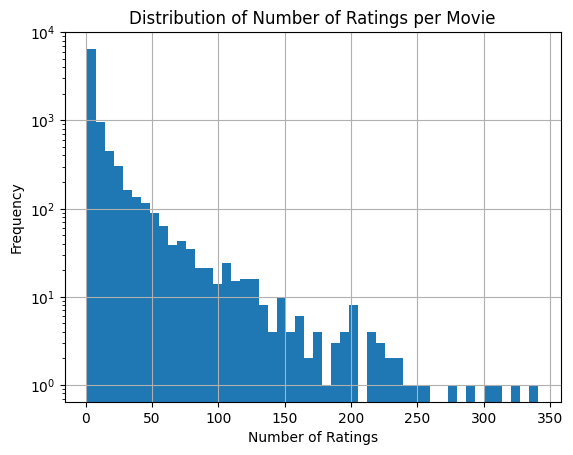

Movies in the Top 10%:
13      341
680     324
278     311
274     304
11      291
       ... 
4104     28
1817     28
9480     28
9560     28
293      28
Name: movieId, Length: 916, dtype: int64
Int64Index([    13,    680,    278,    274,     11,    329,    603,    862,
               424,    280,
            ...
             11843,   9749,  37135, 244786,   9454,   4104,   1817,   9480,
              9560,    293],
           dtype='int64', length=916)


In [ ]:
# Calculate the 90th percentile of ratings
threshold_percentile = ratings_per_movie.quantile(0.9)

# Select movies in the top 10% based on the number of ratings
top_movies = ratings_per_movie[ratings_per_movie >= threshold_percentile].index

# Plot a histogram of the number of ratings per movie
ratings_per_movie.hist(bins=50, log=True)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per Movie')
plt.show()

# Display the movies in the top 10% based on the number of ratings
print("Movies in the Top 10%:")
print(ratings_per_movie.loc[top_movies])

print(top_movies)
ratings_per_movie = ratings_small['movieId'].value_counts()



### Collaborative Model Fitting
Here, we fit the collaborative model (hybrid of SVD and KNNBaseline) we discussed in the previous step, on the trainset of rating_small dataset. Then we use it to predict the testset. This prediction is then used as our list of predicted ratings, which will be taken into account when creating the final hybrid recommender system.

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

sim_options = {
    'name': 'pearson',
    'user_based': False,
    'min_support': 5
}

memory_model = KNNBaseline(k=50, min_k=5, sim_options=sim_options)
memory_model.fit(trainset)
memory_predictions = memory_model.test(testset)

svd_model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
svd_model.fit(trainset)
svd_predictions = svd_model.test(testset)

def get_actual_rating(uid, iid, predictions):
    for pred in predictions:
        if pred.uid == uid and pred.iid == iid:
            return pred.r_ui
    return None

def combine_predictions(predictions_model, predictions_memory):
    combined_predictions = {}

    for prediction in predictions_model:
        uid, iid, est = prediction.uid, prediction.iid, prediction.est
        combined_predictions[(uid, iid)] = [est]

    for prediction in predictions_memory:
        uid, iid, est = prediction.uid, prediction.iid, prediction.est
        if (uid, iid) in combined_predictions:
            combined_predictions[(uid, iid)].append(est)
        else:
            combined_predictions[(uid, iid)] = [est]

    # Create hybrid predictions
    hybrid_predictions = []
    for (uid, iid), estimates in combined_predictions.items():
        actual_rating = get_actual_rating(uid, iid, predictions_model)
        if actual_rating is not None:
            est = np.mean(estimates)
            hybrid_predictions.append(Prediction(uid, iid, actual_rating, est, {}))

    return hybrid_predictions

# Create hybrid predictions by averaging the estimates from both models
collaborative_recommendations = combine_predictions(svd_predictions, memory_predictions)
links_small = pd.read_csv('links_small.csv')

# Create a dictionary to store the total ratings and the count of ratings for each movie
movie_ratings = defaultdict(lambda: {'total_rating': 0, 'count': 0})

# Iterate over the predictions
for pred in collaborative_recommendations:
    movieId = pred.iid
    movie_ratings[movieId]['total_rating'] += pred.est
    movie_ratings[movieId]['count'] += 1

# Calculate the average rating for each movie
average_ratings = {movieId: rating_info['total_rating'] / rating_info['count']
                   for movieId, rating_info in movie_ratings.items()}

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


### Hybrid Recommendation System
As mentioned earlier, for the movies with number of ratings above a certain threshold, we use collaborative as well as content based recommender whereas for the movies with ratings lower than that threshold, we use content based recommender.

In [ ]:
def hybrid_recommendations(user_id, title, metadata_cleaned = metadata_cleaned):
    matching_movie = metadata_cleaned[metadata_cleaned['original_title'] == title]
    matching_movie = matching_movie.rename(columns = {'id':'tmdbId'})
    matching_movie = matching_movie.merge(links_small[['movieId', 'tmdbId']], on='tmdbId', how='left')

    metadata_cleaned = metadata_cleaned.rename(columns = {'id':'tmdbId'})
    metadata_cleaned = metadata_cleaned.merge(links_small[['movieId', 'tmdbId']], on='tmdbId', how='left')

    if not matching_movie.empty:
        # Extract the id from the matching row
        movieId = matching_movie['movieId'].values[0]
        print(f"The id for '{title}' is {movieId}")
    else:
        print(f"No movie found with the title '{title}'")

    if movieId in top_movies:
        # Content-based recommendations
        content_based_recommendations = get_topk_recommendations_info(title, 10)

        # Collaborative filtering predictions for the user
        # Note: 'est' is the estimated rating from the CF model
        metadata_cleaned['est'] = metadata_cleaned['movieId'].map(average_ratings)

        # Merge content-based and collaborative recommendations
        hybrid_df = metadata_cleaned[metadata_cleaned['title'].isin(content_based_recommendations)]
        hybrid_df = hybrid_df.sort_values('est', ascending=False)
        return hybrid_df["title"]
    else:
        content_based_recommendations = get_topk_recommendations_info(title, 10)
        return content_based_recommendations

# Test the hybrid system
print(hybrid_recommendations(123, 'The Shawshank Redemption'))

NameError: ignored